In [2]:
import pandas as pd
df = pd.read_csv("Dataset/segmentacion_clientes_mejorado.csv")
df.head()

,DNI,Edad,Ingreso Mensual,Gasto Mensual,Número de Productos,Tipo de Producto,Tasa de Morosidad,Segmento de Cliente,Región,Historial de Gasto
0,42374168,64,1120.89,109.10,2,Cuenta de Ahorros,0.036741,Retirados,Piura,"[98.84, 108.04, 116.35, 90.68, 117.86, 119.03,..."
1,64424635,36,6501.29,5934.28,1,Inversión,0.166321,Familias,Arequipa,"[5698.49, 6456.3, 6612.51, 4805.89, 7024.28, 6..."
2,88661154,35,12500.04,699.02,4,Inversión,0.053594,Emprendedores,Trujillo,"[762.31, 711.88, 622.93, 622.44, 794.13, 640.8..."
3,14050627,24,19160.30,4379.07,4,Cuenta de Ahorros,0.042978,Jóvenes Emprendedores,Piura,"[3671.34, 4891.88, 4825.9, 3846.52, 3738.93, 4..."
4,41626884,27,16767.62,11673.61,3,Cuenta de Ahorros,0.013493,Jóvenes Emprendedores,Lima,"[12952.33, 9709.99, 10269.73, 10354.88, 13582...."


In [ ]:
# Graficos de Lineas
# -> Son ideales para mostrar como cambia una variable en el tiempo
# -> Este tipo de análisis nos será útil para identificar patrones de gasto en clientes individuales

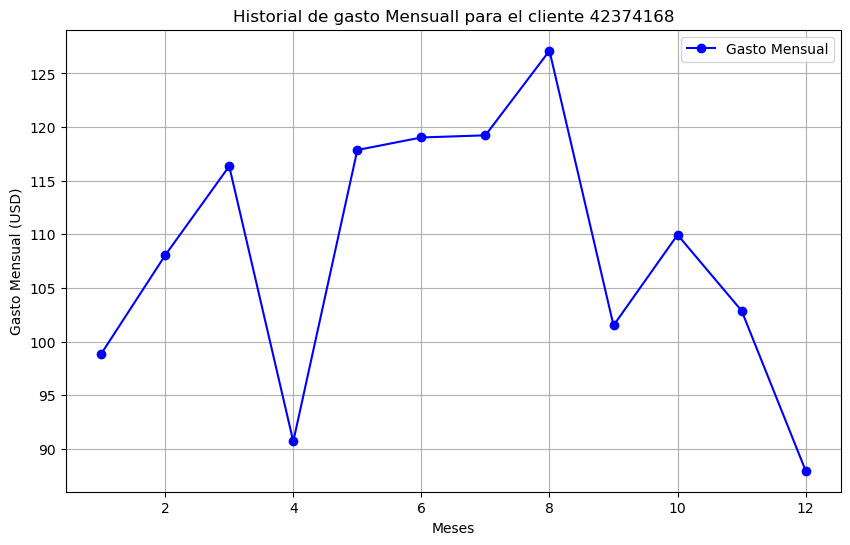

In [8]:
# Historial de gasto de un cliente
import matplotlib.pyplot as plt

historial_gasto = df.loc[0, 'Historial de Gasto']
historial_gasto = eval(historial_gasto)

# Crear un grafico
plt.figure(figsize=(10,6))
plt.plot(range(1,13), historial_gasto, marker = 'o', linestyle='-', color='b', label='Gasto Mensual')
plt.title(f"Historial de gasto Mensuall para el cliente {df.loc[0,"DNI"]}")
plt.xlabel("Meses")
plt.ylabel('Gasto Mensual (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# GRAFICO DE BARRAS
# -> Son útiles para poder comparar cantidades entre diferentes categorias
# -> Este tipo de gráfico nos ayuda a entender como se distribuyen nuestros medidas 
#    según cierto criterio de categorización (departamentos, geografía, etc...)

In [16]:
# Grafico de Barras - Numero de clientes de Clientes por Región
clientes_por_region = df['Región'].value_counts()
print(clientes_por_region)

Región
Trujillo    2001336
Cusco       2000777
Arequipa    2000278
Lima        1999223
Piura       1998386
Name: count, dtype: int64


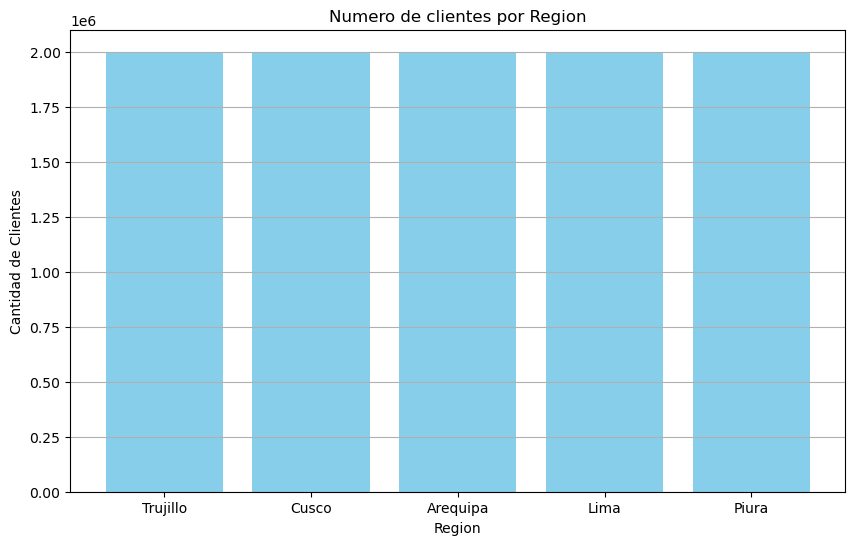

In [14]:
# Grafico de Barras - Numero de clientes de Clientes por Región
clientes_por_region = df['Región'].value_counts()

# Crear un grafico de barras
plt.figure(figsize=(10,6))
plt.bar(clientes_por_region.index, clientes_por_region.values, color='skyblue')
plt.title('Numero de clientes por Region')
plt.xlabel('Region')
plt.ylabel('Cantidad de Clientes')
plt.grid(axis='y')
plt.show()

In [ ]:
# GRAFICO DE DISPERSION
# -> Son útiles para observar la relación entre dos variables numéricas 
# -> Este tipo de análisis es clave e importante para poder identificar patrones de comportamiento entre ingresos y gastos (para un banco)

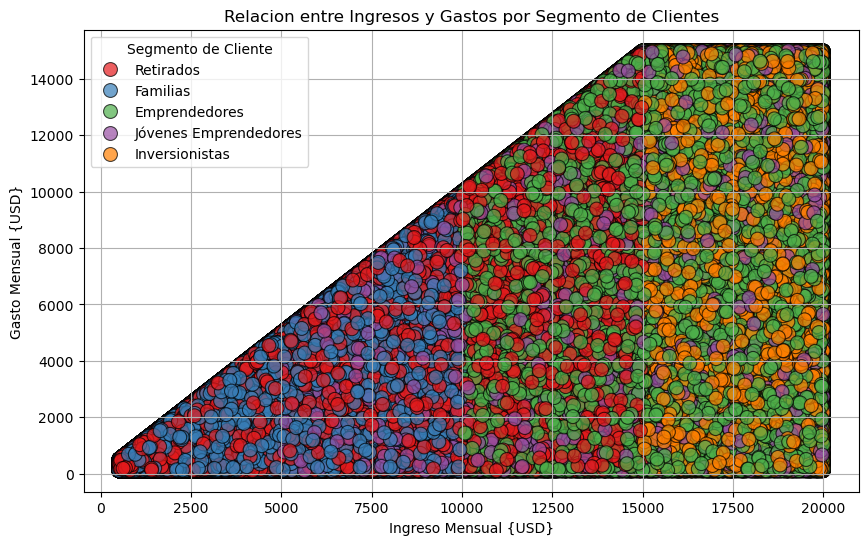

In [18]:
# Grafico de DIspersion para mostrar la relación entre ingresos y gastos

import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Ingreso Mensual', y='Gasto Mensual', hue='Segmento de Cliente', data=df, palette='Set1', s=100, alpha=0.7, edgecolor='k')
plt.title('Relacion entre Ingresos y Gastos por Segmento de Clientes')
plt.xlabel('Ingreso Mensual {USD}')
plt.ylabel('Gasto Mensual {USD}')
plt.grid(True)
plt.show()

In [ ]:
# Graficos de Correlacion - HeatMap
# -> Un HeatMap de Correlacion nos será útil para visualizar rápidamente como están relacionadas entre sí múltiples variables.

In [20]:
corr_matrix = df[['Edad', 'Ingreso Mensual', 'Gasto Mensual', 'Número de Productos', 'Tasa de Morosidad']].corr()
print(corr_matrix)

                         Edad  Ingreso Mensual  Gasto Mensual  \
Edad                 1.000000         0.000344       0.000060   
Ingreso Mensual      0.000344         1.000000       0.603870   
Gasto Mensual        0.000060         0.603870       1.000000   
Número de Productos -0.000208         0.000097       0.000086   
Tasa de Morosidad   -0.000072        -0.096993       0.247258   

                     Número de Productos  Tasa de Morosidad  
Edad                           -0.000208          -0.000072  
Ingreso Mensual                 0.000097          -0.096993  
Gasto Mensual                   0.000086           0.247258  
Número de Productos             1.000000           0.000048  
Tasa de Morosidad               0.000048           1.000000  


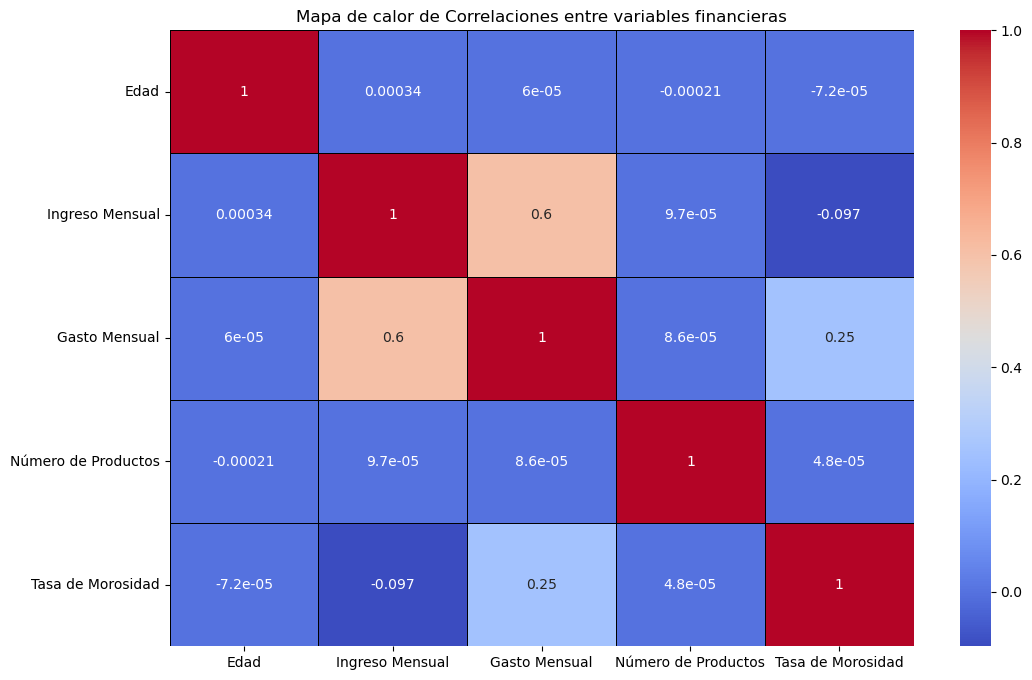

In [21]:
plt.figure(figsize=(12,8))
corr_matrix = df[['Edad', 'Ingreso Mensual', 'Gasto Mensual', 'Número de Productos', 'Tasa de Morosidad']].corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', linewidths=0.5, linecolor='black')
plt.title('Mapa de calor de Correlaciones entre variables financieras')
plt.show()

In [ ]:
# Boxplot
# -> Son útiles para comparar distribuciones y detectar outliers (valores atipicos) en los datos

C:\Users\usernanno2\AppData\Local\Temp\ipykernel_6652\4070559167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmento de Cliente', y='Ingreso Mensual', data=df, palette='Set3')


AttributeError: module 'matplotlib.pyplot' has no attribute 'shot'

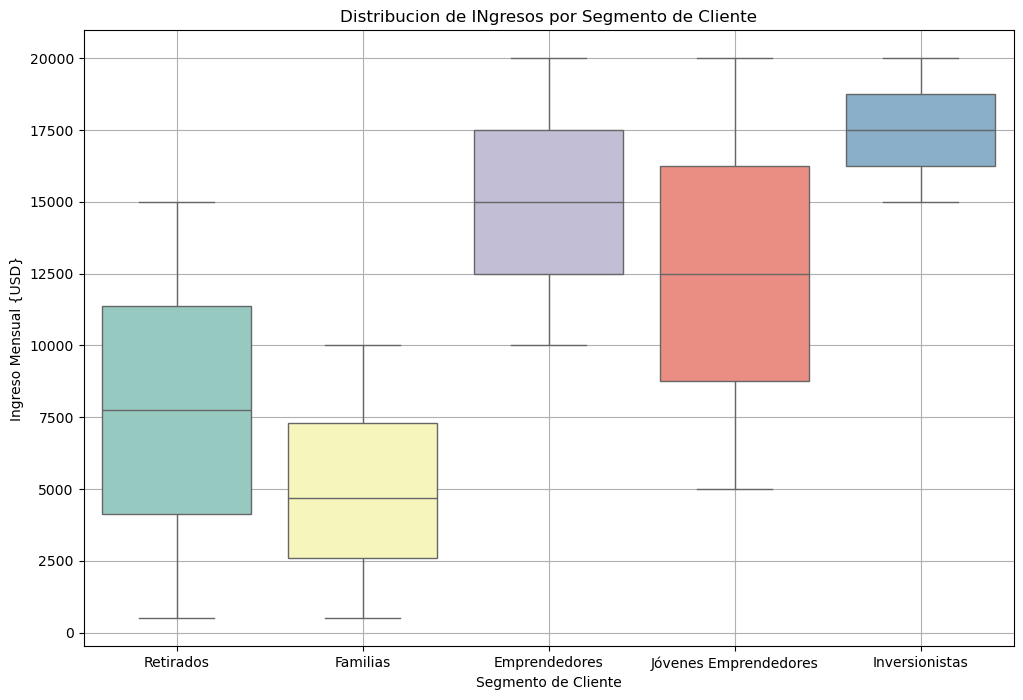

In [22]:
# Distribucion de Ingresos por Segmento de Cliente
plt.figure(figsize=(12,8))
sns.boxplot(x='Segmento de Cliente', y='Ingreso Mensual', data=df, palette='Set3')
plt.title('Distribucion de INgresos por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Ingreso Mensual {USD}')
plt.grid(True)
plt.shot()

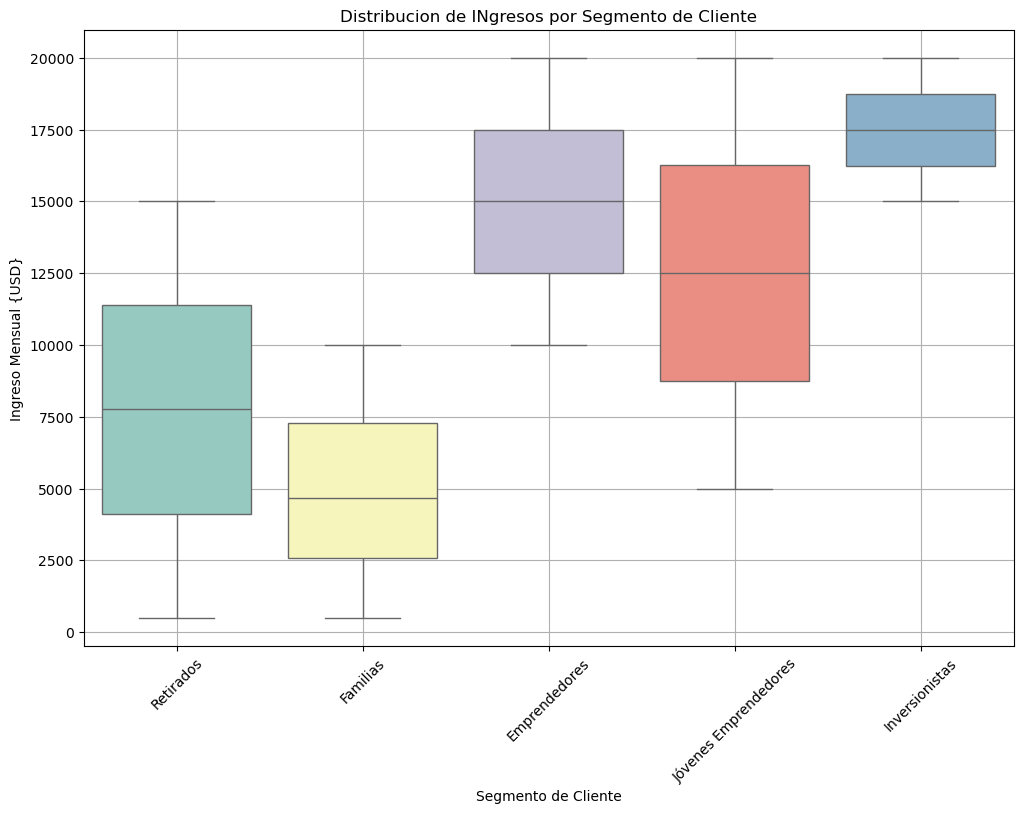

In [26]:
# Distribucion de Ingresos por Segmento de Cliente
plt.figure(figsize=(12,8))
sns.boxplot(x='Segmento de Cliente', y='Ingreso Mensual', hue='Segmento de Cliente', data=df, palette='Set3', legend=False)
plt.title('Distribucion de INgresos por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Ingreso Mensual {USD}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()